In [53]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [54]:
def Train(bigdata, flag = 'Linear', depth = None, vis = False):
    Y = bigdata['MedHouseVal']
    X = bigdata.drop(columns = 'MedHouseVal')
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    if flag == 'Linear':
        model = LinearRegression()
    else:
        model = DecisionTreeRegressor(max_depth = depth)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    if flag == 'Tree' and vis:
        fig = plt.figure(figsize=(25,20))
        _ = plot_tree(model, feature_names = bigdata.drop(columns = 'MedHouseVal').columns,  
                      class_names= 'MedHouseVal', filled=True)

In [70]:
def bestD(bigdata, dif = 3):
    Y = bigdata['MedHouseVal']
    X = bigdata.drop(columns = 'MedHouseVal')
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    scoredif = dif + 1
    depth = 0
    while scoredif >= dif:
        depth += 1    
        model1 = DecisionTreeRegressor(max_depth = depth)
        model2 = DecisionTreeRegressor(max_depth = depth + 1)
        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train)
        scoredif = model2.score(X_test, y_test) - model1.score(X_test, y_test)       
    return depth

## Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
## Проведите первичный анализ.
### a.Проверьте данные на пропуски. Удалите в случае обнаружения. (это тот же датасет, что и из предыдущего дз. Уже там было показано, что пропусков нет и оттуда же выбраны критерии для отсева выбросов)
### b.*Нормализуйте один из признаков.

In [56]:
data = fetch_california_housing()
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df['MedHouseVal'] = pd.Series(data.target)
df = df[df['MedHouseVal'] < 4.9]
df = df[(df['MedInc'] < 9) & (df['HouseAge'] < 51.5) & (df['AveRooms'] < 10)] 

## Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
## Обучите модель регрессии на обучающем множестве.
## Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [57]:
Train(df)

0.5837306846950057


## Обучите дерево решений на обучающем множестве.
### a. Повторите п. 5 для полученной модели.
### b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [58]:
Train(df, flag = 'Tree', depth = None, vis = False)

0.57395193195049


0.47294548269152725


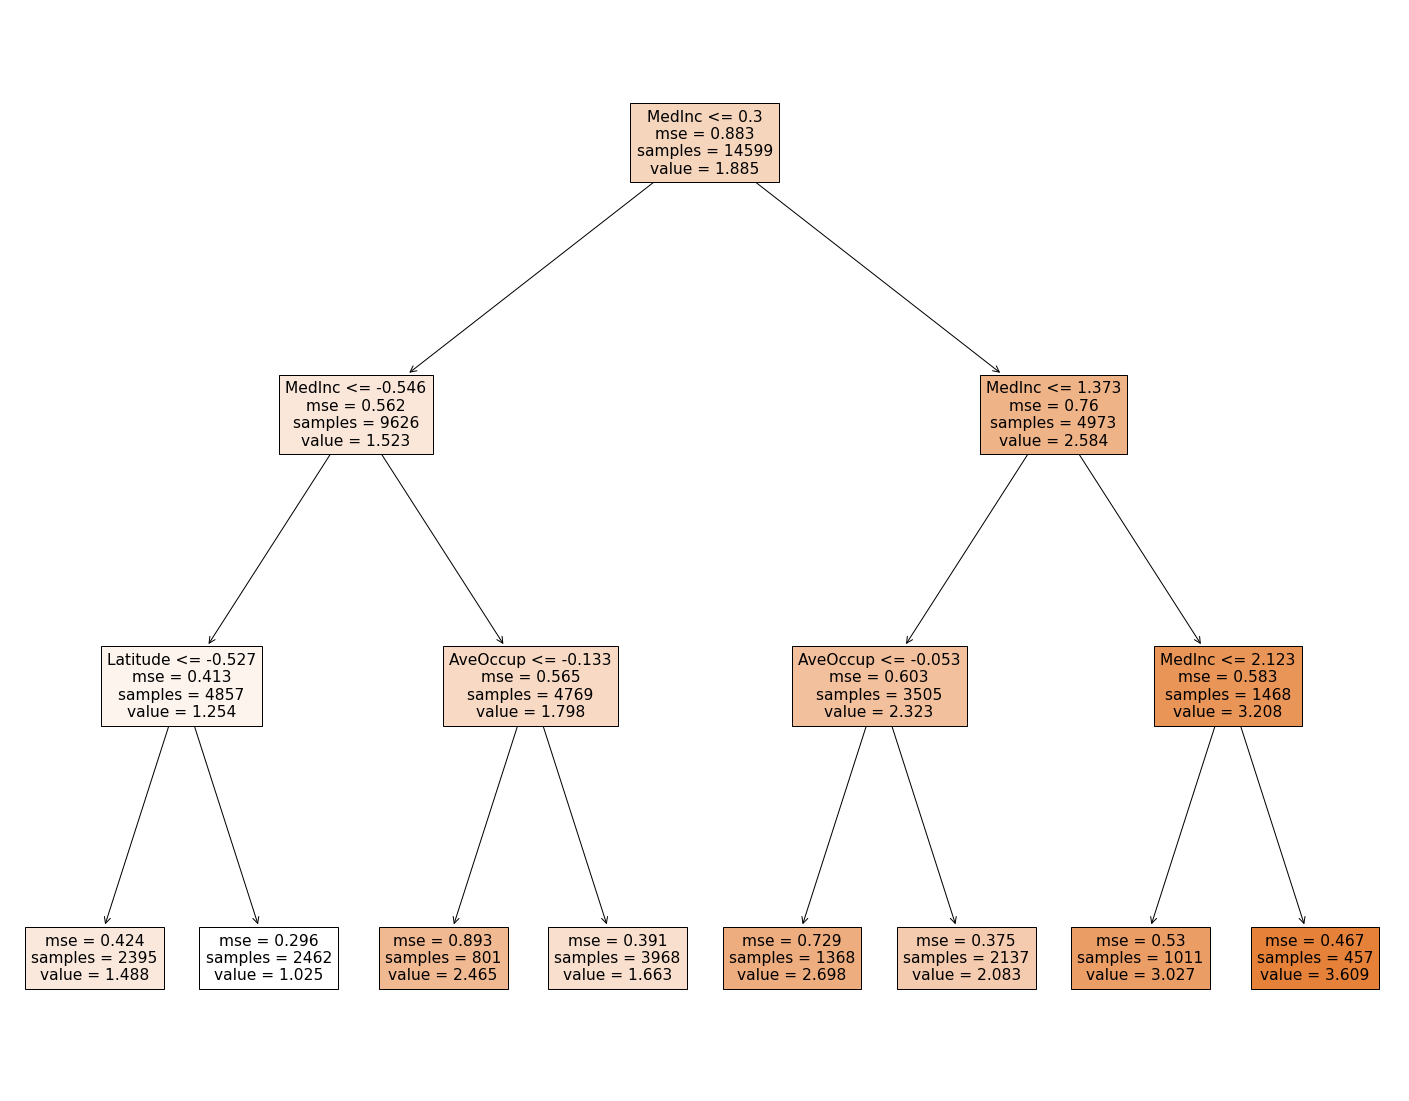

In [59]:
Train(df, flag = 'Tree', depth = 3, vis = True)

## Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
### a. Повторите п. 5 для полученной модели.

In [79]:
bestD(df, dif = 0.03)

5

In [84]:
Train(df, flag = 'Tree', depth = 5, vis = False)

0.5806271409377397


## Сформулируйте выводы по проделанной работе.
### a. Сравните точность двух моделей.
### b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

## Выводы:
### а) Модель линейной регрессии и дерево решений с оптимизацией глубины выдали одинаковую точность.
### б) Линейную регрессию выгоднее использовать для данных, где целевая переменная может быть выражена линейно через признаки, нет более сложных зависимостей. Дерево решений позволяет работать не только с линейно выражаемыми целевыми переменными, отбирать признаки для feature seelction. Минус дерева в том, что оно константно вне диапазона обучения, склонно к переобучению.